In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df=pd.read_csv('Bengaluru_House_Data[1].csv')

In [24]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [25]:
df.shape

(13320, 9)

In [26]:
df.isnull().mean()*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [27]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [28]:
df.drop(columns=['availability','area_type','society','balcony'],axis=1,inplace=True)

In [29]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [30]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [31]:
df.dropna(inplace=True)
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [32]:
df.shape

(13246, 5)

In [33]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [34]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [37]:
df['bhk']=df['size'].apply(lambda x: int(x.split(' ')[0]))

In [38]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [39]:
df.drop(columns=['size'],axis=1,inplace=True)

In [40]:
df.shape

(13246, 5)

In [42]:
df[df.bhk>22]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [43]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [45]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True 

In [46]:
df[~df['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [50]:
def convert_sqft_into_number(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [51]:
df1 = df.copy()

df1['total_sqft'] = df1['total_sqft'].apply(convert_sqft_into_number)

In [53]:
df1.loc[30]      #row

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [54]:
df2 = df1.copy()

In [55]:
df2['price_per_sqft'] = df2['price']*100000 / df2['total_sqft']
df2.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [56]:
df2['location'].value_counts()

Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: location, Length: 1304, dtype: int64

In [59]:
df2['location']= df2['location'].apply(lambda x: x.strip())
df2.location.value_counts()

Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [62]:
loc_stats = df['location'].value_counts()
loc_stats_filtered = loc_stats[loc_stats <= 10]
print(loc_stats_filtered)


Dairy Circle         10
Kalkere              10
Dodsworth Layout     10
Sadashiva Nagar      10
Naganathapura        10
                     ..
Vidyapeeta            1
Maruthi Extension     1
Okalipura             1
Old Town              1
Abshot Layout         1
Name: location, Length: 1063, dtype: int64


In [63]:
loc_less_than_10 = loc_stats[loc_stats<=10]
loc_less_than_10

Dairy Circle         10
Kalkere              10
Dodsworth Layout     10
Sadashiva Nagar      10
Naganathapura        10
                     ..
Vidyapeeta            1
Maruthi Extension     1
Okalipura             1
Old Town              1
Abshot Layout         1
Name: location, Length: 1063, dtype: int64

In [64]:
df2.location = df2.location.apply(lambda x: 'other' if x in loc_less_than_10 else x)
df2.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [65]:
len(df2.location.unique())

271

In [66]:
df2[ (df2.total_sqft / df2.bhk <300)].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,other,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [67]:
df3 = df2[ ~(df2.total_sqft / df2.bhk <300)]
df3.shape

(12502, 6)

In [68]:
df3.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [73]:
def remove_outlier_from_price_per_sqft(df):
    df_out = pd.DataFrame()
    for key,sub in df.groupby('location'):
        m= np.mean(sub.price_per_sqft)
        st=np.std(sub.price_per_sqft)
        reduce_df =sub[(sub.price_per_sqft>(m-st)) & (sub.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduce_df],ignore_index=True)
    return df_out    

In [74]:
df4 = remove_outlier_from_price_per_sqft(df3)
df4.shape

(10210, 6)

In [75]:
df4.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10210.000000,10210.000000,10210.00000,10210.000000,10210.000000
mean,1502.887238,2.473262,90.95350,2.571596,5659.837177
std,876.668748,0.981522,86.20678,0.896121,2273.769545
min,300.000000,1.000000,10.00000,1.000000,1250.000000
25%,1108.000000,2.000000,49.00000,2.000000,4242.057674
50%,1280.000000,2.000000,67.00000,2.000000,5174.219497
75%,1650.000000,3.000000,100.00000,3.000000,6425.272826
max,30400.000000,16.000000,2200.00000,16.000000,24509.803922


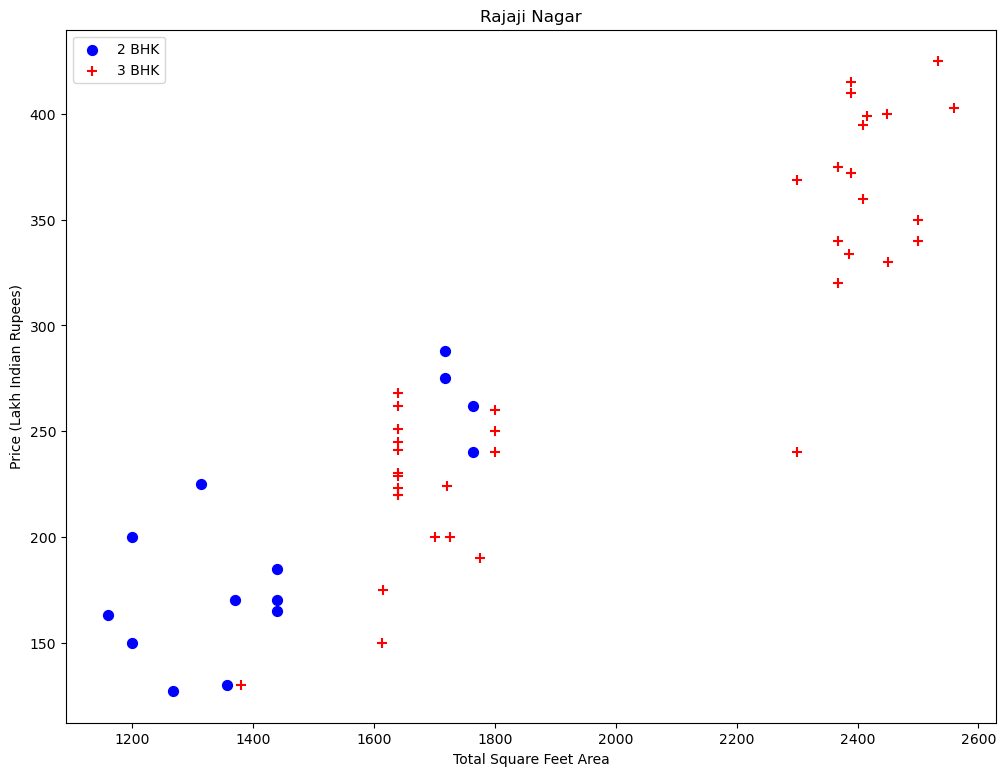

In [83]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (12,9)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue' ,label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='red',label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price (Lakh Indian Rupees)')
    plt.title(location)
    plt.legend()
    
    
plot_scatter_chart(df4,'Rajaji Nagar')    
    
    

In [84]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices =np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index') 
df5=remove_bhk_outliers(df4)
df5.shape

(7314, 6)

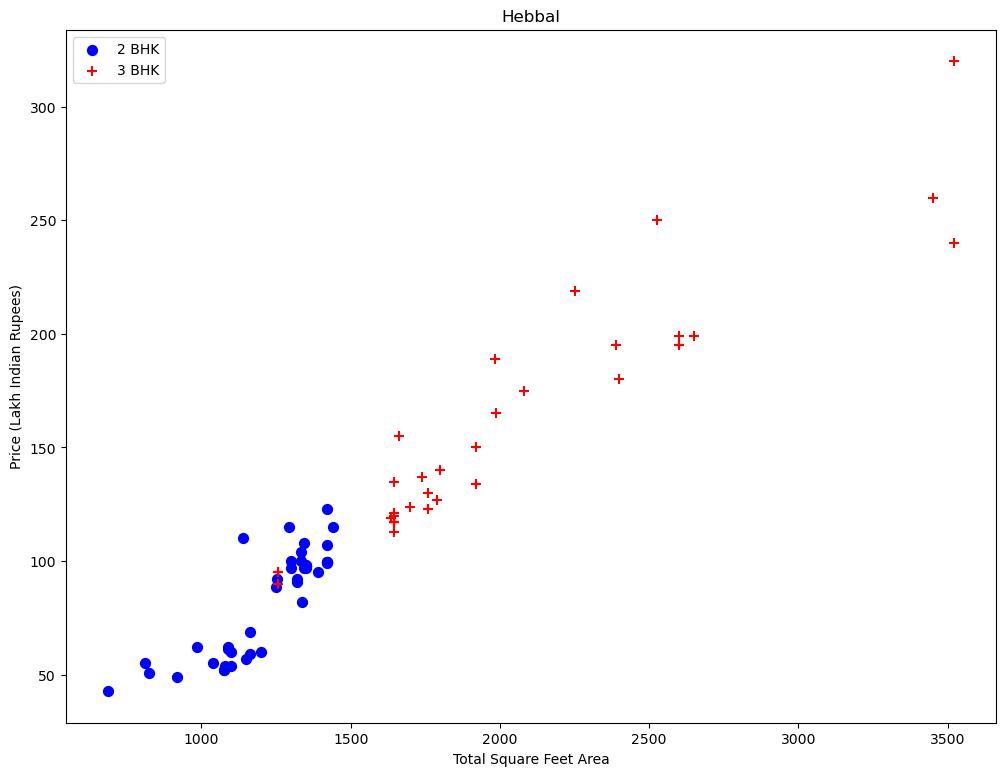

In [85]:
plot_scatter_chart(df5, 'Hebbal')

In [86]:
df5.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [87]:
df5[df5.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5274,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8487,other,12000.0,12.0,525.0,10,4375.000000
8574,other,10000.0,16.0,550.0,16,5500.000000
9299,other,6000.0,12.0,150.0,11,2500.000000
9624,other,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

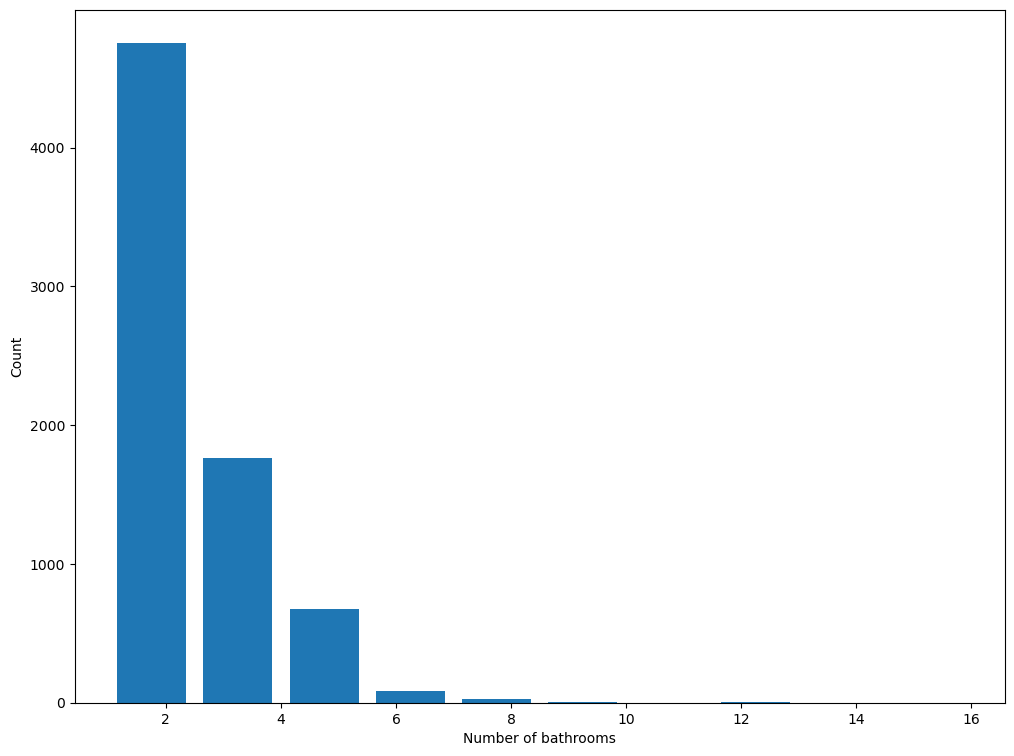

In [88]:
plt.hist(df5.bath,rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [89]:
df5[(df5.bath > df5.bhk+2)]

,location,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5235,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6718,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8416,other,11338.0,9.0,1000.0,6,8819.897689


In [90]:
df6 = df5[~(df5.bath > df5.bhk+2)]
df6.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


In [91]:
df6.shape

(7310, 6)

In [92]:
df7= df6.drop(['price_per_sqft'],axis="columns")
df7.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [94]:
dummies = pd.get_dummies(df7.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,south
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
df8= pd.concat([df7,dummies.drop('other',axis='columns')],axis='columns')
df8.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,south
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
df8.drop('location',axis='columns',inplace=True)
df8.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,south
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
df8.shape

(7310, 257)

In [98]:
x= df8.drop('price',axis=1)
y= df8['price']

In [99]:
x.shape

(7310, 256)

In [100]:
y.shape

(7310,)

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=101)


In [102]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((5848, 256), (1462, 256), (5848,), (1462,))

In [103]:
from  sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test, y_test)

0.8306887362384373

In [104]:
pred =lr.predict(X_test)
pred

array([ 12.14104557, 135.12197623, 250.87452645, ...,  71.45104157,
       294.41983369, 113.60824243])

In [105]:
y_test

1274     32.0
9772    133.0
4495    260.0
2365    100.0
8786     55.0
        ...  
1630     46.0
5486     50.0
2480     80.0
9864    300.0
4525    125.0
Name: price, Length: 1462, dtype: float64

In [106]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(x.columns==location)[0][0]
     
    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if loc_index >=0:
        X[loc_index] = 1
         
    return lr.predict([X])[0]            

In [107]:
predict_price('1st Phase JP Nagar',1000 , 2, 2)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.46084780862861

In [108]:
predict_price('1st Phase JP Nagar',1000 , 2, 3)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.08848018297269

In [110]:
import joblib
joblib.dump(lr, "banglore house price prediction model.pkl")

['banglore house price prediction model.pkl']